In [1]:
import matplotlib.pyplot as plt
import torch
import os
os.chdir("..")  # Change root dir to project folder
os.getcwd()

'/home/bbd0953/diffusion'

In [7]:
from pathlib import Path
import humanize

parent = Path("data/generated/diffusion_v1.0/")
    
print(len(sorted(parent.glob('**/*'))), "files.")
    
size = sum(f.stat().st_size for f in parent.glob('**/*') if f.is_file())
size += parent.stat().st_size if parent.is_file() else 0
print(f"Size: {humanize.naturalsize(size)}")

13500 files.
Size: 11.7 MB


In [3]:
import datetime
datetime.datetime.now().strftime("%H:%M:%S")

'14:00:41'

In [9]:
from torch.utils.data import DataLoader
from tqdm import tqdm


def test_dl(dl):
    for _ in tqdm(range(10)):
        next(iter(dl))

for n in range(4):
    dl = DataLoader(dataset, batch_size=128, num_workers=n, drop_last=True)
    print(f"\n{n}")
    %timeit test_dl(dl)


0


100%|██████████| 10/10 [00:47<00:00,  4.70s/it]


46.5 s ± 1.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

1


100%|██████████| 10/10 [00:03<00:00,  2.67it/s]


3.75 s ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

2


100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


4.85 s ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

3


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

6.16 s ± 47.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
from model.unet import Unet
import inspect

inspect.signature(Unet.__init__).parameters.keys()

odict_keys(['self', 'init_channels', 'out_channels', 'channel_mults', 'input_channels', 'self_condition', 'resnet_norm_groups'])

DDIM loop step:   0%|          | 0/100 [00:00<?, ?it/s]

(<Figure size 1200x1200 with 36 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]],
       dtype=object))

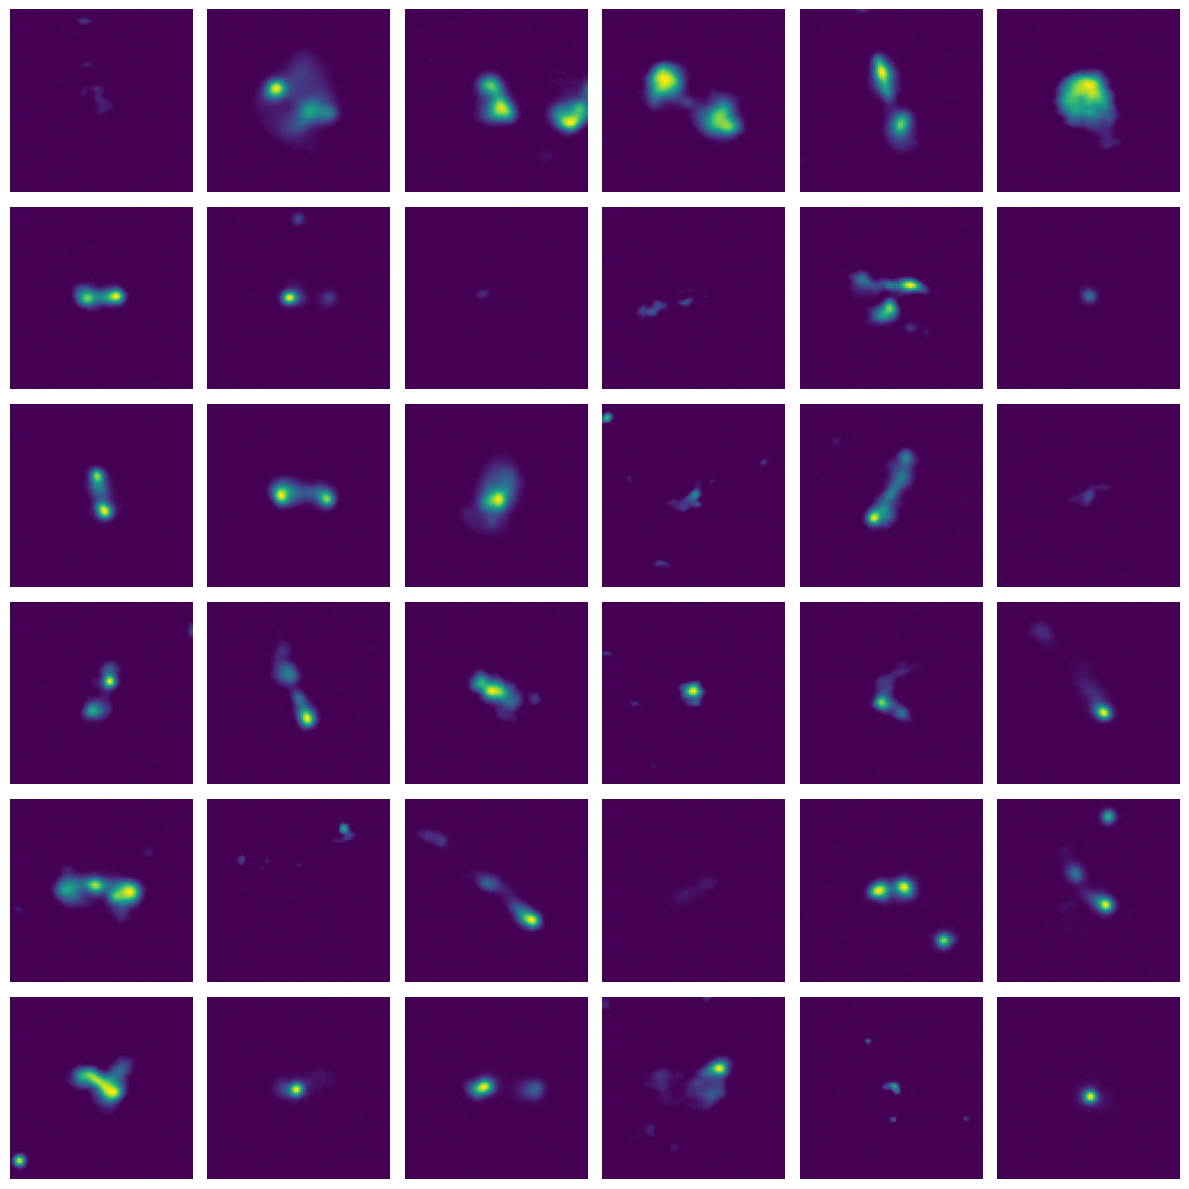

In [2]:
from torchvision.transforms import ToTensor, Compose, CenterCrop
from torch.utils.data import DataLoader

from firstgalaxydata import FIRSTGalaxyData as FGD
from unet import Unet

from diffusion import Diffusion
from utils import plot_samples

model_file = "/home/bbd0953/diffusion/results/DDPM_23-09-01_08:03:11_EMA.pt"

bsize = 36  # Should have integer square root

model = Unet(dim=160, channels=1, dim_mults=(1, 2, 3, 4)).to('cuda:1')
model.load_state_dict(torch.load(model_file))

diffusion = Diffusion(timesteps=1000)

imgs = diffusion.ddim_sample(model, 80, batch_size=bsize,)[-1]  # Only last time step
model = model.to('cpu');

plot_samples(imgs)

In [118]:
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
class ImagePathDataset(torch.utils.data.Dataset):
    # From:
    #  https://github.com/mseitzer/pytorch-fid/blob/master/src/pytorch_fid/fid_score.py
    def __init__(self, path, transforms=None):
        self.path = path
        self.files = sorted(self.path.iterdir())
        self.transforms = transforms

        print("Loading images...")
        load = lambda f: Image.open(f)
        self.data = list(map(load, tqdm(self.files)))

        print("Data set initialized.")

    def __len__(self):
        return len(self.files)

    def __getitem__(self, i):
        img = self.data[i]
        if self.transforms is not None:
            img = self.transforms(img)
        return img


def load_data(
    *, data_dir, batch_size, deterministic=False
):
    dataset = ImagePathDataset(data_dir, transforms=ToTensor())
    if deterministic:
        loader = DataLoader(
            dataset, batch_size=batch_size, shuffle=False, num_workers=1, drop_last=True
        )
    else:
        loader = DataLoader(
            dataset, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True
        )
    print("Mark 1")
    yield from loader
    print("Loop done.")

In [78]:
import shutil

dummy = Path("./data/dummy")
src = Path("./data/lofar_rand10k_0/")

i = 0
for f in src.iterdir():
    shutil.copy(f, dummy.joinpath(f.name))
    i += 1
    if i >= 3:
        break

In [119]:
from pathlib import Path

img_folder = Path("./data/dummy/")

data = load_data(data_dir=img_folder, batch_size=1)

In [130]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Hi")

INFO:root:Hi
